## Question 1

In any iteration, for no output there are two possibilities (line 7 and line 13). Let this event be denoted by R \
$P(R) = P(C1=1)P(C2=0)+P(C1=0)P(C2=0) $ \
$P(R) = \frac{c_y}{(c_y + c_x)}.(1-p_y) + \frac{c_x}{(c_y + c_x)}.(1-p_x)$ \
$P(R) = 1 - \frac{p_x.c_x + p_y.c_y}{c_x + c_y}$ \
Event for output (denoted by A) is complement of R \ 
$P(A) = 1 - P(R)$ \
$P(A) = \frac{p_x.c_x + p_y.c_y}{c_x + c_y}$ \
Hence, no. of iterations for output follows $Geometric(\frac{p_x.c_x + p_y.c_y}{c_x + c_y})$ distribution\
\
Let Output be denoted by $O$. $n$ denotes number of iterations. Event of output 1 in $n$th iteration denoted by $A_n$ \
$P(O=1) = \sum_{n=1}^{\infty} P(A_n)$ \
$P(O=1) = \sum_{n=1}^{\infty} P(\text{No acceptance till n-1 iterations}).P(\text{output 1 in 1 iteration})$ \
$P(O=1) = \sum_{n=1}^{\infty} P(R)^{n-1}.P(\text{output 1 in 1 iteration})$ \
$P(O=1) = P(\text{output 1 in 1 iteration}).\frac{1}{1-P(R)}$ \
$P(O=1) = \frac{c_y}{c_x+c_y} . p_y . \frac{c_x + c_y}{p_x.c_x + p_y.c_y}$ \
$P(O=1) = \frac{c_y.p_y}{p_x.c_x + p_y.c_y}$ \
Similarly, $P(O=0) = \frac{c_x.p_x}{p_x.c_x + p_y.c_y}$ \
Hence, output follows $Bern(\frac{c_y.p_y}{p_x.c_x + p_y.c_y})$ event

In [1]:
using Distributions
using Plots
using StatsPlots

## Question 2

In [12]:
function Sample(p)
    u = []
    for i in 1:p
        push!(u,rand(Uniform(-1,1)))
    end
    v = 0
    for i in 1:p
        v = v + u[i]*u[i]
    end
    while v>1
        u = []
        for i in 1:p
            push!(u,rand(Uniform(-1,1)))
        end
        v = 0
        for i in 1:p
            v = v + u[i]*u[i]
        end        
    end
    return u    
end

Sample (generic function with 1 method)

In [13]:
repeats = 10000

10000

In [14]:
p = 2
samples = zeros(p,repeats)
for i in 1:repeats
    u = Sample(2)
    samples[1,i] = u[1]
    samples[2,i] = u[2]
end

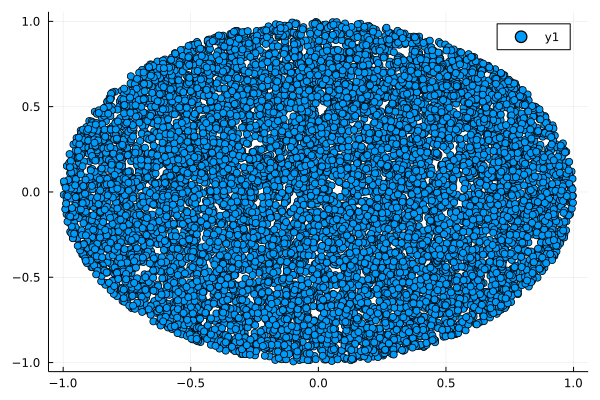

In [16]:
plot(samples[1,:],samples[2,:],seriestype = :scatter)

#### we can see that the distribution is fairly uniform on the circle for p=2
#### for the same number of samples, as p increases, the distribution might look less uniform

## Question 3

In [18]:
function TruncStdNormal(a)
    t = pdf(Normal(),a)
    y = rand(Normal())
    f = pdf(Normal(),y)
    while f<=t
        y = rand(Normal())
        f = pdf(Normal(),y)        
    end
    return y
end

TruncStdNormal (generic function with 1 method)

In [29]:
repeats = 20000

20000

In [30]:
samples = []
a = 1
for i in 1:repeats
    push!(samples,TruncStdNormal(a))
end

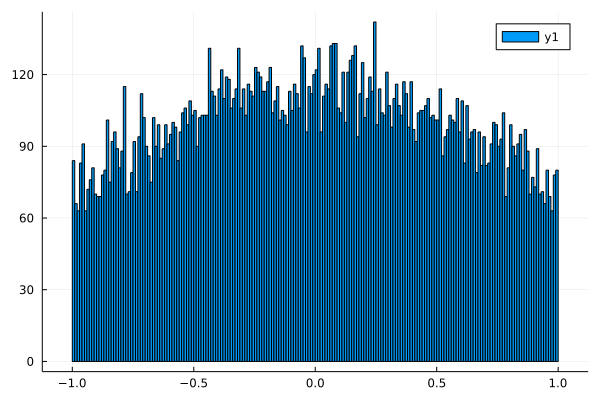

In [41]:
plot(histogram(samples, bins = -1:0.01:1))

In [42]:
samples = []
a = 4
for i in 1:repeats
    push!(samples,TruncStdNormal(a))
end

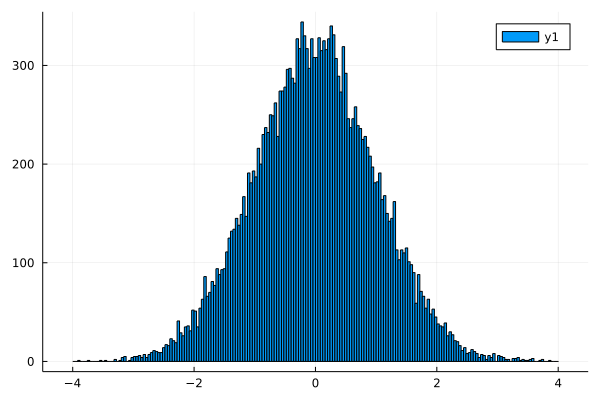

In [43]:
plot(histogram(samples, bins = -a:0.01*a:a))

#### setting for a = 4 looks closer to standard normal than for a = 1